In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 学習データ作成

# データ点数
data_size = 20

# 0~1までのデータを20個作成
x = np.linspace(0,1,data_size)
x

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

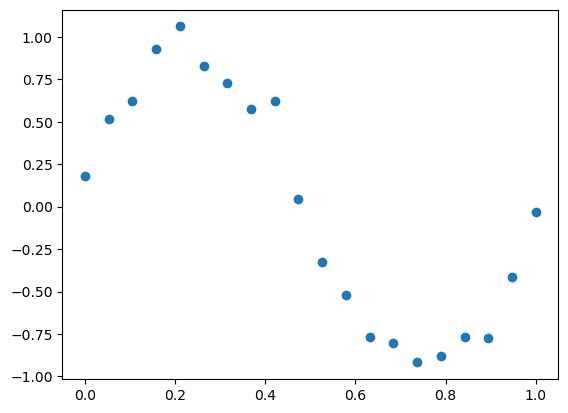

In [3]:
noise = np.random.uniform(low=-1.0,high=1.0,size=data_size) * 0.2

# ノイズを加えたy軸の値
y = np.sin(2.0 * np.pi * x) + noise

plt.scatter(x,y)

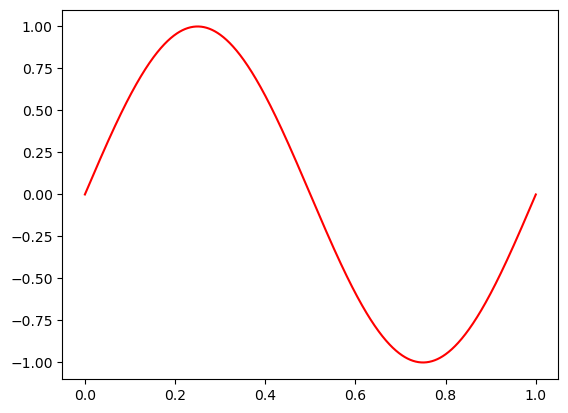

In [4]:
# 元のsin波を表示

x_line = np.linspace(0,1,1000)
sin_x = np.sin(2.0 * np.pi * x_line)
plt.plot(x_line,sin_x,'red')

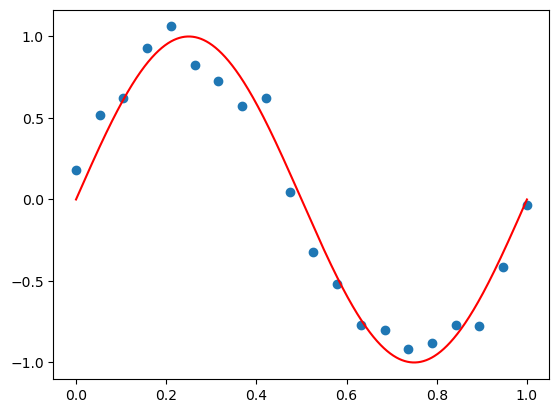

In [5]:
# 元のsin波と学習データを描画
# 何度も呼び出したいので関数化

def plot_sin():
    plt.scatter(x,y)
    plt.plot(x_line,sin_x,'red')

# 関数呼び出し 
plot_sin()

In [6]:
# 線形回帰学習モデルをインポート
from sklearn.linear_model import LinearRegression

In [7]:
# 以下、モデルをつくって学習

#xの形を確認
x

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

In [8]:
#xは１次元配列なのでこれをベクトル形式にする必要がある、のでreshapeしておく (20,) －＞ (20,1)
x.shape

(20,)

In [9]:
# x.reshape(行,列): 例：x.reshape(-1,2) (20,) －＞ (10,2)
# -1行は全ての行を指定。

# 線形回帰 実行
lin_reg = LinearRegression().fit(x.reshape(-1,1),y)

# 学習結果を表示
lin_reg.intercept_,lin_reg.coef_

(0.8620558971815063, array([-1.73290182]))

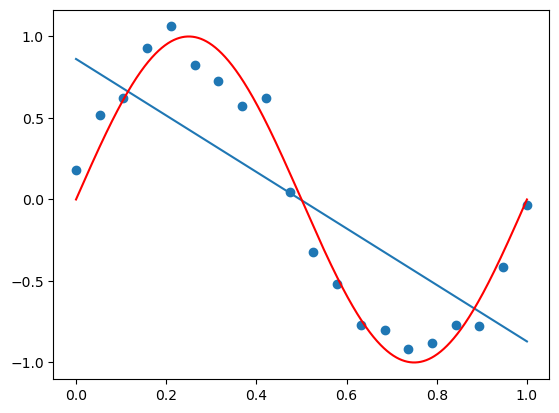

In [11]:
# 図にする

# まったく近似できていないのを確認
plt.plot(x_line, lin_reg.intercept_ + lin_reg.coef_ * x_line)
plot_sin()

In [12]:
# 多項式回帰をやってみる
# 二乗を追加
x_2 = x ** 2

# 学習用データを生成 axis=1で列方向に配列を1つ結合させる
x_new = np.concatenate([x.reshape(-1,1),x_2.reshape(-1,1)],axis=1)

x_new

array([[0.        , 0.        ],
       [0.05263158, 0.00277008],
       [0.10526316, 0.01108033],
       [0.15789474, 0.02493075],
       [0.21052632, 0.04432133],
       [0.26315789, 0.06925208],
       [0.31578947, 0.09972299],
       [0.36842105, 0.13573407],
       [0.42105263, 0.17728532],
       [0.47368421, 0.22437673],
       [0.52631579, 0.27700831],
       [0.57894737, 0.33518006],
       [0.63157895, 0.39889197],
       [0.68421053, 0.46814404],
       [0.73684211, 0.54293629],
       [0.78947368, 0.6232687 ],
       [0.84210526, 0.70914127],
       [0.89473684, 0.80055402],
       [0.94736842, 0.89750693],
       [1.        , 1.        ]])

In [13]:
# 再びモデルをつくって学習
lin_reg_2 = LinearRegression().fit(x_new,y)

# 2つの傾きが得られる
lin_reg_2.intercept_,lin_reg_2.coef_

(0.940175961401671, array([-2.22766222,  0.49476041]))

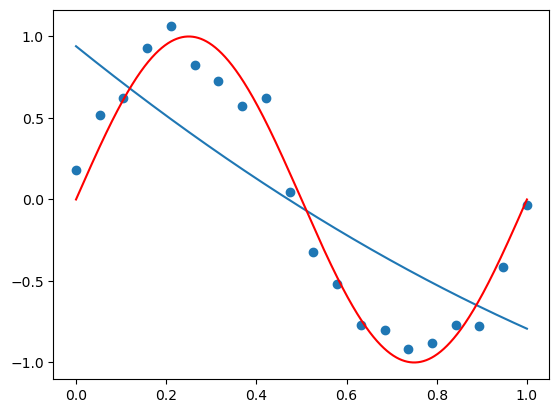

In [15]:
# 図にする
# 二乗だけでは、不十分であることがわかる。
plt.plot(x_line,lin_reg_2.intercept_ + lin_reg_2.coef_[0] * x_line + lin_reg_2.coef_[1] * x_line ** 2)
plot_sin()

In [17]:
# 上記の多項式をscikit-learnのライブラリのPolynomialFeaturesを用いると簡単に実装できる。
from sklearn.preprocessing import PolynomialFeatures

In [18]:
# degree=3で三乗
poly = PolynomialFeatures(degree=3)

# 多項式を生成
poly.fit(x.reshape(-1,1))

# 得られたデータを格納
x_poly_3 = poly.transform(x.reshape(-1,1))

# 0列目:1のみ 1列目：元データ　2列目：2乗データ　3列目：3乗データ
x_poly_3

(array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.00000000e+00, 5.26315789e-02, 2.77008310e-03, 1.45793847e-04],
        [1.00000000e+00, 1.05263158e-01, 1.10803324e-02, 1.16635078e-03],
        [1.00000000e+00, 1.57894737e-01, 2.49307479e-02, 3.93643388e-03],
        [1.00000000e+00, 2.10526316e-01, 4.43213296e-02, 9.33080624e-03],
        [1.00000000e+00, 2.63157895e-01, 6.92520776e-02, 1.82242309e-02],
        [1.00000000e+00, 3.15789474e-01, 9.97229917e-02, 3.14914711e-02],
        [1.00000000e+00, 3.68421053e-01, 1.35734072e-01, 5.00072897e-02],
        [1.00000000e+00, 4.21052632e-01, 1.77285319e-01, 7.46464499e-02],
        [1.00000000e+00, 4.73684211e-01, 2.24376731e-01, 1.06283715e-01],
        [1.00000000e+00, 5.26315789e-01, 2.77008310e-01, 1.45793847e-01],
        [1.00000000e+00, 5.78947368e-01, 3.35180055e-01, 1.94051611e-01],
        [1.00000000e+00, 6.31578947e-01, 3.98891967e-01, 2.51931768e-01],
        [1.00000000e+00, 6.84210526e-0

In [19]:
# LinearRegressionの学習実行
lin_reg_3 = LinearRegression().fit(x_poly_3,y)

In [24]:
# y=ax^3 + bx^2 + cxのそれぞれの係数に対してxの乗数をかける式を作成するのは面倒
# 例：y= lin_reg_2.intercept_ + lin_reg_2.coef_[0] * x_line + lin_reg_2.coef_[1] * x_line ** 2
# そこで、predictメソッドを利用すると簡単に表現できる
# 注意：predict関数の引数は、学習データと同じ形でないといけない。(今回の場合は、x_poly_3=0列目:1のみ 1列目：元データ　2列目：2乗データ　3列目：3乗データ)
# そのため、まずはx_lineを学習データと同じ形に変換する

# 変換前のデータを表示
x_line

array([0.        , 0.001001  , 0.002002  , 0.003003  , 0.004004  ,
       0.00500501, 0.00600601, 0.00700701, 0.00800801, 0.00900901,
       0.01001001, 0.01101101, 0.01201201, 0.01301301, 0.01401401,
       0.01501502, 0.01601602, 0.01701702, 0.01801802, 0.01901902,
       0.02002002, 0.02102102, 0.02202202, 0.02302302, 0.02402402,
       0.02502503, 0.02602603, 0.02702703, 0.02802803, 0.02902903,
       0.03003003, 0.03103103, 0.03203203, 0.03303303, 0.03403403,
       0.03503504, 0.03603604, 0.03703704, 0.03803804, 0.03903904,
       0.04004004, 0.04104104, 0.04204204, 0.04304304, 0.04404404,
       0.04504505, 0.04604605, 0.04704705, 0.04804805, 0.04904905,
       0.05005005, 0.05105105, 0.05205205, 0.05305305, 0.05405405,
       0.05505506, 0.05605606, 0.05705706, 0.05805806, 0.05905906,
       0.06006006, 0.06106106, 0.06206206, 0.06306306, 0.06406406,
       0.06506507, 0.06606607, 0.06706707, 0.06806807, 0.06906907,
       0.07007007, 0.07107107, 0.07207207, 0.07307307, 0.07407

In [25]:
#fitとtransformをいっぺんに呼び出す関数がfit_transform
x_line_poly_3 = poly.fit_transform(x_line.reshape(-1,1))

# 学習データx_poly_3と同じ形式になった。
x_line_poly_3

array([[1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.00000000e+00, 1.00100100e-03, 1.00200300e-06, 1.00300601e-09],
       [1.00000000e+00, 2.00200200e-03, 4.00801202e-06, 8.02404808e-09],
       ...,
       [1.00000000e+00, 9.97997998e-01, 9.96000004e-01, 9.94006010e-01],
       [1.00000000e+00, 9.98998999e-01, 9.97999000e-01, 9.97000002e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

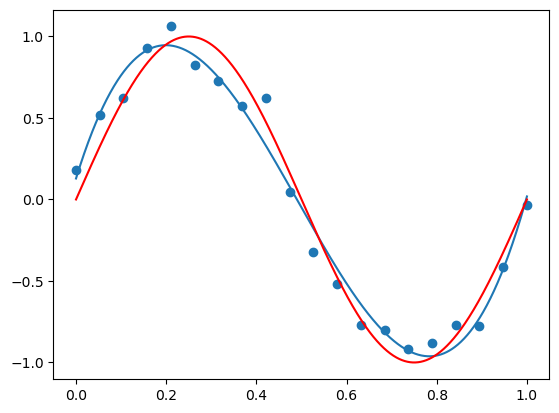

In [26]:
# グラフを描画
plt.plot(x_line,lin_reg_3.predict(x_line_poly_3))
plot_sin()

# 3乗にすると、LinearRegressionで学習させた結果は、元のsin波に近づいた。

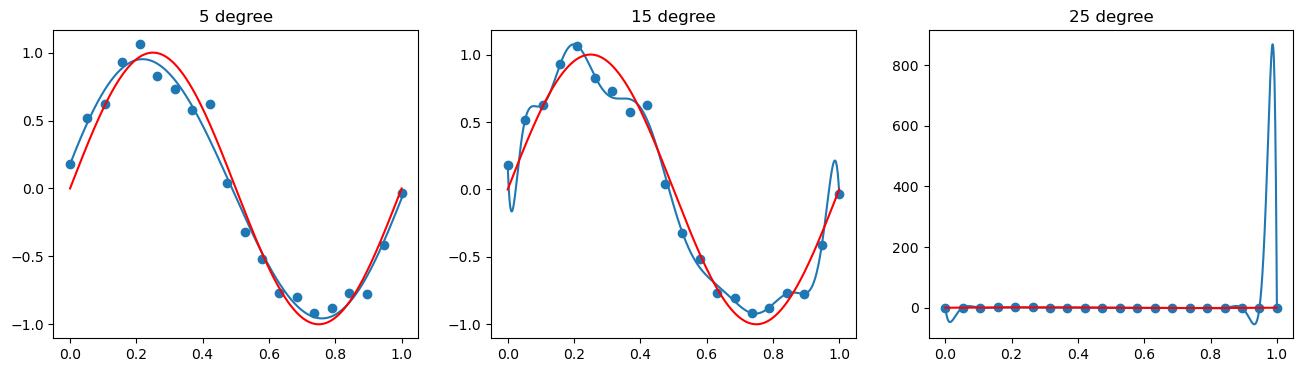

In [28]:
# 乗数をさらに増やしてみる。

# グラフ描画用のキャンバスを生成
fig,axes = plt.subplots(1,3,figsize=(16,4))

# 5乗、15乗、25乗を用意
for degree,ax in zip([5,15,25],axes):
    poly = PolynomialFeatures(degree=degree)
    x_poly = poly.fit_transform(x.reshape(-1,1))
    
    # 学習させる
    lin_reg = LinearRegression().fit(x_poly,y)
    
    # predict関数を実行するために、データを整形
    x_line_poly = poly.fit_transform(x_line.reshape(-1,1))
    
    # 描画
    ax.plot(x_line,lin_reg.predict(x_line_poly))
    ax.scatter(x,y)
    ax.plot(x_line,sin_x,'red')
    
    # グラフタイトルを描画
    ax.set_title("{} degree".format(degree))

In [29]:
# 以上より、最小二乗法では、単純に次数を増やしても効果はないということが分かった
# 過学習（過剰適合）の問題がある。
# 正則化というテクニックを使って過学習を防いでみる

import mglearn
import pandas as pd
from sklearn.model_selection import train_test_split

In [64]:
# データセットを用意 (scikit-learn 1.2でボストンのデータセットをサポートしなくなる旨のエラーが表示される)
x,y = mglearn.datasets.load_extended_boston()

# xは住宅の部屋の数などのデータ
x

C:\Users\kkrsk\miniconda3\envs\ML_Youtube\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California h

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, ...,
        1.00000000e+00, 8.96799117e-02, 8.04248656e-03],
       [2.35922539e-04, 0.00000000e+00, 2.42302053e-01, ...,
        1.00000000e+00, 2.04470199e-01, 4.18080621e-02],
       [2.35697744e-04, 0.00000000e+00, 2.42302053e-01, ...,
        9.79579831e-01, 6.28144504e-02, 4.02790570e-03],
       ...,
       [6.11892474e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.07891832e-01, 1.16406475e-02],
       [1.16072990e-03, 0.00000000e+00, 4.20454545e-01, ...,
        9.82676920e-01, 1.29930407e-01, 1.71795127e-02],
       [4.61841693e-04, 0.00000000e+00, 4.20454545e-01, ...,
        1.00000000e+00, 1.69701987e-01, 2.87987643e-02]])

In [65]:
# yは家賃データ
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [66]:
# panadasで見やすい表に変換
df_x = pd.DataFrame(x)
df_y = pd.DataFrame(y)

df_x

,0,1,2,3,4,5,6,7,8,9,...,94,95,96,97,98,99,100,101,102,103
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,...,0.043270,0.059749,0.208015,0.018655,0.082503,0.287234,0.025759,1.000000,0.089680,0.008042
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.104962,0.021462,0.306021,0.553191,0.113111,1.000000,0.204470,0.041808
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,...,0.011017,0.058064,0.103885,0.006661,0.306021,0.547514,0.035109,0.979580,0.062814,0.004028
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066412,0.002230,0.421118,0.645222,0.021667,0.988585,0.033197,0.001115
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,...,0.004461,0.043345,0.066794,0.006635,0.421118,0.648936,0.064464,1.000000,0.099338,0.009868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.000633,0.00,0.420455,0.0,0.386831,0.580954,0.681771,0.122671,0.000000,0.164122,...,0.026936,0.146662,0.162090,0.035958,0.798551,0.882553,0.195787,0.975392,0.216382,0.048003
502,0.000438,0.00,0.420455,0.0,0.386831,0.490324,0.760041,0.105293,0.000000,0.164122,...,0.026936,0.146662,0.164122,0.033286,0.798551,0.893617,0.181239,1.000000,0.202815,0.041134
503,0.000612,0.00,0.420455,0.0,0.386831,0.654340,0.907312,0.094381,0.000000,0.164122,...,0.026936,0.146662,0.164122,0.017707,0.798551,0.893617,0.096414,1.000000,0.107892,0.011641
504,0.001161,0.00,0.420455,0.0,0.386831,0.619467,0.889804,0.114514,0.000000,0.164122,...,0.026936,0.146662,0.162694,0.021512,0.798551,0.885843,0.117127,0.982677,0.129930,0.017180


In [67]:
# データ作成
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [68]:
# モデルを作って学習
lin_reg = LinearRegression().fit(x_train,y_train)

In [73]:
# 訓練データでは95%適合しているが、未知のデータ(テストデータ)を与えると適合率は60%になる。
# 104項目もあるためテストデータのscoreは低い
# つまり、どの項目を使うか選択する必要がある

print("train score={}".format(round(lin_reg.score(x_train,y_train),3)))
print("test score={}".format(round(lin_reg.score(x_test,y_test),3)))

train score=0.952
test score=0.607


In [74]:
# リッジ回帰とラッソ回帰をやって過学習を防いでみる
# リッジ回帰、ラッソ回帰用の関数をインポート
from sklearn.linear_model import Ridge,Lasso

In [75]:
# リッジ回帰で学習
ridge = Ridge().fit(x_train,y_train)

In [76]:
# モデルのトレーニングとテストデータの正解率を表示する関数
def print_score(model):
    print("train score={}".format(round(model.score(x_train,y_train),3)))
    print("test score={}".format(round(model.score(x_test,y_test),3)))

In [77]:
# リッジ回帰解析結果
# LinearRegressionよりテストの正答率が向上した。
# リッジ解析：係数の絶対値を小さくして学習

print_score(ridge)

train score=0.886
test score=0.753


In [78]:
# alpha: alphaが大きいと、リッジ回帰の係数の絶対値が小さくなる
# デフォルト係数は１、alpha=10としてみる。
# テストデータの正解率は低下した。
ridge_10 = Ridge(alpha=10).fit(x_train,y_train)
print_score(ridge_10)

train score=0.788
test score=0.636


In [81]:
# alpha=0.1としてみる。
# テストデータの正解率は増加した。
ridge_01 = Ridge(alpha=0.1).fit(x_train,y_train)
print_score(ridge_01)

train score=0.928
test score=0.772


In [82]:
# リッジ回帰における、係数を比較
coefficients = pd.DataFrame({'lin_reg':lin_reg.coef_,'ridge':ridge.coef_,'ridge_10':ridge_10.coef_,'ridge_01':ridge_01.coef_})

# 行は、データの次元数
# 通常の線形回帰では、全体的に各項目の係数が大きくなっているが、リッジ解析では、係数の絶対値が小さくなっている。
# リッジ回帰はalphaを適切な値に設定する必要がある。
coefficients

,lin_reg,ridge,ridge_10,ridge_01
0,-412.710947,-1.413684,-2.333007,-2.333007
1,-52.243207,-1.556619,-5.441929,-5.441929
2,-131.898815,-1.465434,-6.128655,-6.128655
3,-12.004136,-0.126616,-0.778525,-0.778525
4,-15.510713,-0.079119,1.291530,1.291530
...,...,...,...,...
99,35.361714,-2.361124,-0.559662,-0.559662
100,11.955343,0.043467,4.947479,4.947479
101,0.677026,1.208860,2.667765,2.667765
102,2.734520,-6.325992,-6.907626,-6.907626


In [83]:
# ラッソ回帰

# ラッソ回帰で学習
lasso = Lasso().fit(x_train,y_train)

# 結果を表示
# 訓練とテストデータの正答率がどちらも低い
# これは、データが足りないことが想定される＝ほとんどの係数を0にしてしまっている
print_score(lasso)

train score=0.293
test score=0.209


In [85]:
# ラッソ回帰のalphaで調整する
lasso_001 = Lasso(alpha=0.01, max_iter=10000).fit(x_train,y_train)
print_score(lasso_001)

train score=0.896
test score=0.766


In [86]:
# ラッソ回帰における、係数を比較
coefficients = pd.DataFrame({'lin_reg':lin_reg.coef_,'ridge':lasso.coef_,'lasso_001':lasso_001.coef_})

# 行は、データの次元数
# 通常の線形回帰では、全体的に各項目の係数が大きくなっているが、リッジ解析では、係数の絶対値が小さくなっている。
# ラッソ回帰はalphaを適切な値に設定する必要がある。
coefficients

,lin_reg,ridge,lasso_001
0,-412.710947,-0.0,-0.000000
1,-52.243207,0.0,-0.000000
2,-131.898815,-0.0,-0.000000
3,-12.004136,0.0,0.000000
4,-15.510713,-0.0,-0.000000
...,...,...,...
99,35.361714,-0.0,0.000000
100,11.955343,-0.0,-0.000000
101,0.677026,0.0,0.344041
102,2.734520,-0.0,-8.246456
